In [61]:
import opendatasets as od
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,plot_confusion_matrix,  confusion_matrix, f1_score, plot_roc_curve, plot_precision_recall_curve
import matplotlib.pyplot as plt
%matplotlib inline


In [27]:
od.download("https://www.kaggle.com/datasets/uciml/mushroom-classification")

Skipping, found downloaded files in ".\mushroom-classification" (use force=True to force download)


In [28]:
df= pd.read_csv("mushroom-classification/mushrooms.csv")
df.head()

#e= edible , p=poisonous

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


__cap-shape:__  bell=b, conical=c, convex=x, flat=f,  knobbed=k, sunken=s

__cap-surface__: fibrous=f, grooves=g, scaly=y, smooth=s

__cap-color:__ brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y

__bruises:__ bruises=t, no=f

__odor:__ almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s

__gill-attachment:__ attached=a, descending=d, free=f, notched=n

__gill-spacing:__ close=c, crowded=w, distant=d

__gill-size:__ broad=b, narrow=n

__gill-color:__ black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y

__stalk-shape:__ enlarging=e, tapering=t

__stalk-root:__ bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?

__stalk-surface-above-ring:__ fibrous=f, scaly=y, silky=k, smooth=s

__stalk-surface-below-ring:__ fibrous=f, scaly=y, silky=k, smooth=s

__stalk-color-above-ring:__ brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

__stalk-color-below-ring:__ brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

__veil-type:__ partial=p, universal=u

__veil-color:__ brown=n, orange=o, white=w, yellow=y

__ring-number:__ none=n, one=o, two=t

__ring-type:__ cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z

__spore-print-color:__ black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y

__population:__ abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y

__habitat:__ grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

In [29]:
df.columns.value_counts().sum()
#23 Columns

23

In [30]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [31]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

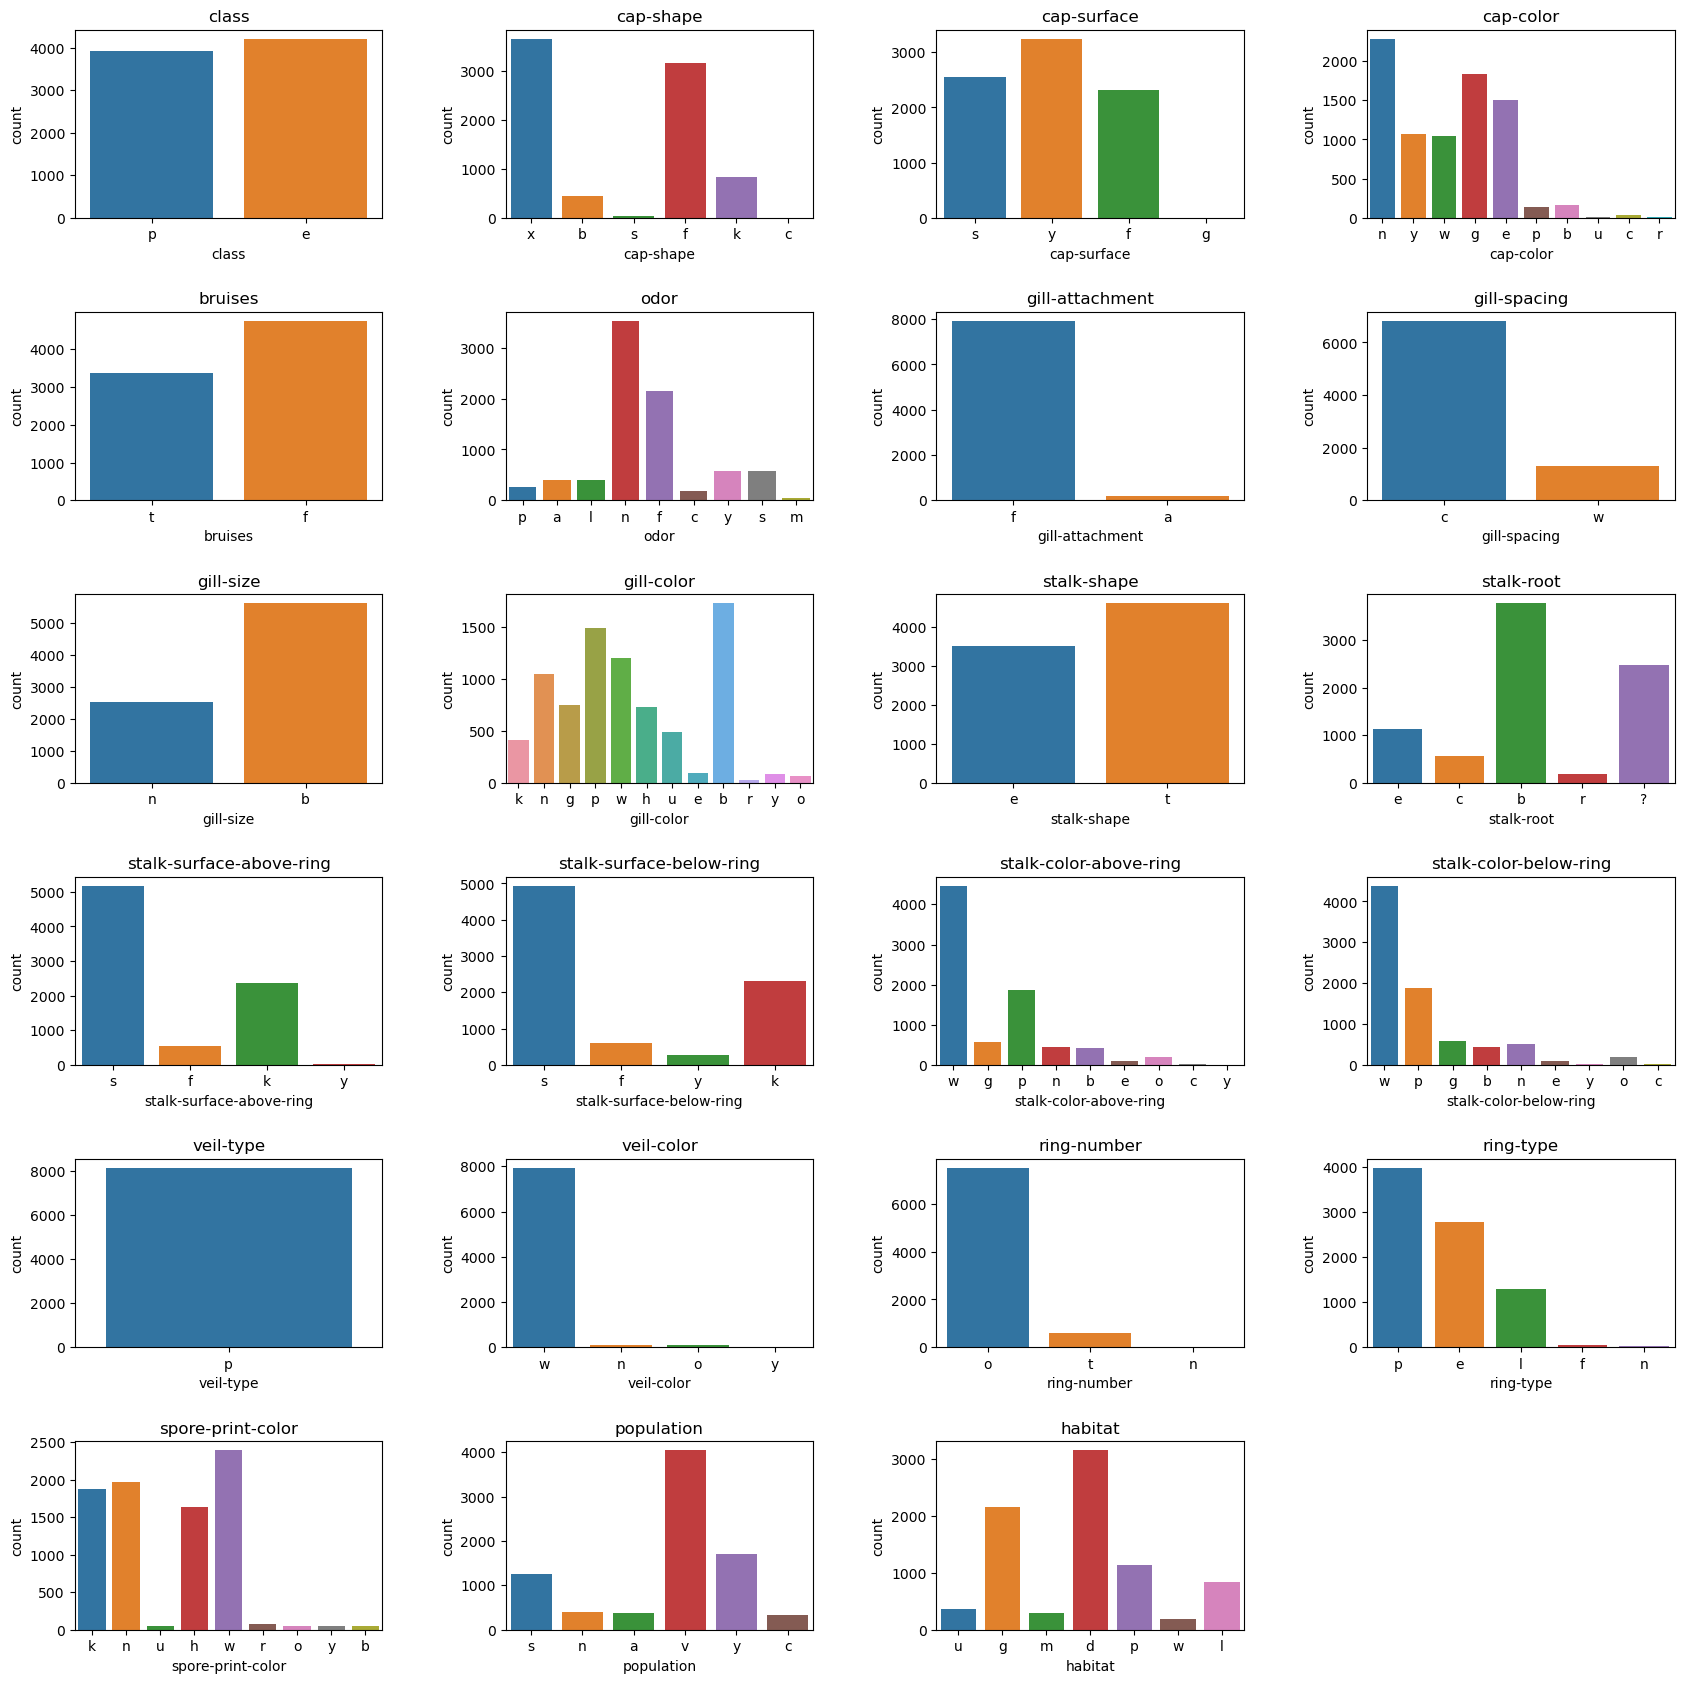

In [33]:
fig, axes= plt.subplots(nrows=6, ncols= 4, figsize=(20,20))

for n, each in enumerate(df.columns):
    ax= plt.subplot(6,4,n+1)
    sns.countplot(x=df[each])

    plt.title(f"{each}")

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.5)  
axes.flat[-1].set_visible(False)  
plt.show()


##### Some observations from the countplot

No class imbalance is seen in the dataset


In [34]:
df= pd.get_dummies(df, drop_first=True)
df.head()

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [35]:
df.describe(include="all")

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,0.000492,0.387986,0.101920,0.003939,0.450025,0.000492,0.314623,0.399311,0.005416,...,0.049237,0.153619,0.497292,0.210734,0.264402,0.102413,0.035943,0.140817,0.045298,0.023634
std,0.499708,0.022185,0.487321,0.302562,0.062641,0.497527,0.022185,0.464394,0.489787,0.073399,...,0.216375,0.360605,0.500023,0.407855,0.441041,0.303209,0.186159,0.347854,0.207969,0.151914
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
df.corr().sum()

class_p       -0.213295
cap-shape_c    2.412229
cap-shape_f   -0.401485
cap-shape_k    0.250276
cap-shape_s    0.836504
                 ...   
habitat_l      0.515697
habitat_m      1.134546
habitat_p     -0.354572
habitat_u      1.122887
habitat_w      1.868444
Length: 96, dtype: float64

<AxesSubplot:>

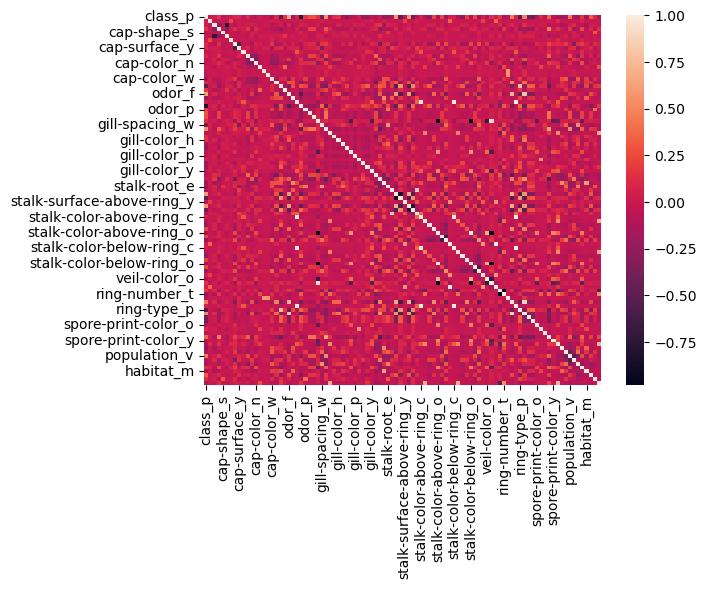

In [37]:
sns.heatmap(df.corr())

In [38]:
y= df["class_p"]
x= df.copy(deep=True)
x.drop("class_p" , axis=1,inplace=True)

In [39]:
x_train,x_test, y_train, y_test= train_test_split(x,y ,random_state=33, test_size=0.4)

x_train.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
4299,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4442,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
5981,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3805,0,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2129,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [58]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [55]:
y_pred= model.predict(x_test)


In [56]:
model.score(x_train,y_train)

0.9997948297086582

In [59]:
model.score(x_test,y_test)

0.9993846153846154

In [50]:
roc_auc_score(y_test,y_pred)

0.9993698802772526

In [53]:
confusion_matrix(y_test,y_pred)

array([[1663,    0],
       [   2, 1585]], dtype=int64)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


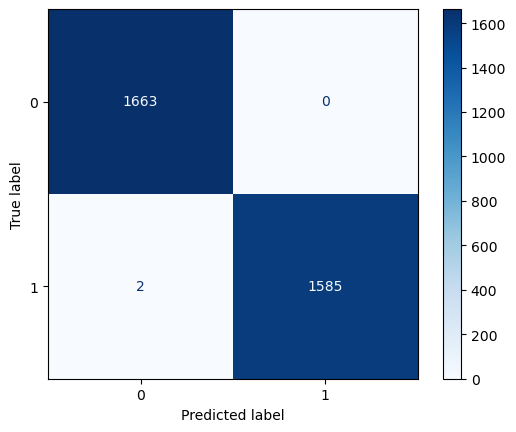

In [62]:
plot_confusion_matrix(model, x_test, y_test, cmap=plt.cm.Blues)
plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


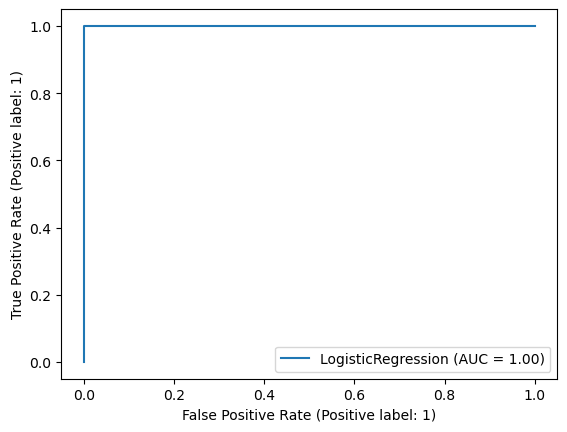

In [64]:
plot_roc_curve(model,x_test,y_test)

In [65]:
f1_score(y_test,y_pred)

0.9993694829760403